In [4]:
# Import `create_game` package, wherever it is located for you. 
import sys
sys.path.insert(0, '..')
from create_game.tool_gen import ToolGenerator
from create_game import register_json_folder, register_json_str

# Set the matplotlib settings for rendering the result video to the notebook.
# See the comment at the bottom for more information. 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
import matplotlib.animation
import gym
import numpy as np

/home/soham/USC/Courses/CSCI566_DeepLearning/create/lib/python3.8/site-packages/cffi/cparser.py:163: UserWarning: Global variable '_cpBBNewForExtents' in cdef(): for consistency with C it should have a storage class specifier (usually 'extern')
  warnings.warn("Global variable '%s' in cdef(): for consistency "
/home/soham/USC/Courses/CSCI566_DeepLearning/create/lib/python3.8/site-packages/cffi/cparser.py:163: UserWarning: Global variable '_cpBBNewForCircle' in cdef(): for consistency with C it should have a storage class specifier (usually 'extern')
  warnings.warn("Global variable '%s' in cdef(): for consistency "
/home/soham/USC/Courses/CSCI566_DeepLearning/create/lib/python3.8/site-packages/cffi/cparser.py:163: UserWarning: Global variable '_cpBBIntersects' in cdef(): for consistency with C it should have a storage class specifier (usually 'extern')
  warnings.warn("Global variable '%s' in cdef(): for consistency "
/home/soham/USC/Courses/CSCI566_DeepLearning/create/lib/python3.8/si

Loading chipmunk for Linux (64bit) [/home/soham/USC/Courses/CSCI566_DeepLearning/create/lib/python3.8/site-packages/pymunk/libchipmunk.so]
pygame 2.1.2 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
with open("/home/soham/USC/Courses/CSCI566_DeepLearning/CREATE/create_game/splits/full_clean/set_train.npy", 'rb') as f:
        train_set = np.load(f)

In [3]:
train_set

array([1419,  313,  320, 1466,  352,  380, 1710, 1578, 1658, 1693,  309,
        171, 1702,  395, 1600, 1507, 2257,  336, 1700,  397,  382, 1505,
         89,  189,  167,   85, 1652,  125, 1462, 1591, 2363,  100,  340,
        359, 1752, 1611, 1481,  163,  281, 1821, 2349, 1564,   49,  306,
         28,  108, 1641,  294,   58,  196, 1623, 2271, 1618, 2273, 1730,
         77,  245, 1599, 1802, 1675, 1649, 1539,  272, 1484, 1497, 1831,
       1589,  295,  166, 1475, 2308,  131,   74, 2305,  338,  178, 1761,
       1741,  388,  181, 1633,   73,  372, 2344, 1428,  201,  172, 1518,
       2261, 1615, 2276,  215,   68, 1512,  312, 1594, 1455, 2362,  317,
        348, 1537, 2356, 2364, 1636,  339,   17, 1574,   46, 1558,  396,
        175, 1686, 1546, 1581,    6, 1769, 1519,  153, 2316, 2295, 2286,
         29,  264, 2313, 1592,  130,  337, 1627,  322,  390, 1483, 1610,
       1801, 1552,   19, 1707, 1803, 2306,  354, 1762, 2347, 2325, 2289,
         25, 1751, 1634, 2249, 1513, 1747, 1583, 14

In [6]:
# Register your folder of .json files defining the tasks
register_json_folder('./custom_json')

In [4]:
# Register a string as a JSON environment
json_str = """ {
    "name": "CustomPush2",
    "lvl_type": "marker",
    "target": "[-0.1, -0.25 + OFFSET]",
    "goal": "[0.7, -0.75 + OFFSET]",
    "rnd": {
        "marker_ball:0": "[uniform(-HIGH_NOISE, HIGH_NOISE), uniform(-HIGH_NOISE, HIGH_NOISE)]",
        "target,medium_floor:0": "[uniform(-HIGH_NOISE, HIGH_NOISE), uniform(-HIGH_NOISE, HIGH_NOISE)]",
        "goal,medium_floor:1": "[uniform(-HIGH_NOISE, HIGH_NOISE), uniform(-HIGH_NOISE, HIGH_NOISE)]"
    },  
    "env": [
        {   
            "name": "marker_ball",
            "pos": [0.6, 0.75],
            "id": 0
        },  
        {   
            "name": "medium_floor",
            "pos": "[0.1, -0.25]",
            "id": 0
        },  
        {   
            "name": "medium_floor",
            "pos": "[0.7, -0.75]",
            "id": 1
        }   
    ]   
}
"""
register_json_str(json_str)

In [12]:
train_set

array([1419,  313,  320, 1466,  352,  380, 1710, 1578, 1658, 1693,  309,
        171, 1702,  395, 1600, 1507, 2257,  336, 1700,  397,  382, 1505,
         89,  189,  167,   85, 1652,  125, 1462, 1591, 2363,  100,  340,
        359, 1752, 1611, 1481,  163,  281, 1821, 2349, 1564,   49,  306,
         28,  108, 1641,  294,   58,  196, 1623, 2271, 1618, 2273, 1730,
         77,  245, 1599, 1802, 1675, 1649, 1539,  272, 1484, 1497, 1831,
       1589,  295,  166, 1475, 2308,  131,   74, 2305,  338,  178, 1761,
       1741,  388,  181, 1633,   73,  372, 2344, 1428,  201,  172, 1518,
       2261, 1615, 2276,  215,   68, 1512,  312, 1594, 1455, 2362,  317,
        348, 1537, 2356, 2364, 1636,  339,   17, 1574,   46, 1558,  396,
        175, 1686, 1546, 1581,    6, 1769, 1519,  153, 2316, 2295, 2286,
         29,  264, 2313, 1592,  130,  337, 1627,  322,  390, 1483, 1610,
       1801, 1552,   19, 1707, 1803, 2306,  354, 1762, 2347, 2325, 2289,
         25, 1751, 1634, 2249, 1513, 1747, 1583, 14

In [116]:
import random

In [140]:
def generate_actions(solve):
    tools_list = [0,2,10,15,21,25,35,150,600]
    solver_x_y = [[0.7,0.5],[-0.35,-0.5]]
    solver_tools = [0,10,15,21,600]
    actions = []
    for i in range(9):
        tool = random.randint(0,len(tools_list))
        done = False
        while not done:
            x = random.uniform(-1,1)
            y = random.uniform(-1,1)
            if not (solve and (0 > x > -0.65 and -0.2 > y > -0.8) and (0.9 > x > 0 and 0.8 > y > 0)):
                done = True
        actions.append([tool,x,y])
    if solve:
        actions[0] = [solver_tools[random.randint(0,len(solver_tools)-1)],solver_x_y[0][0],solver_x_y[0][1]]
        actions[-1] = [solver_tools[random.randint(0,len(solver_tools)-1)],solver_x_y[1][0],solver_x_y[1][1]]
    return actions

In [141]:
actions = generate_actions(True)

In [39]:
# actions = [[0, 0.7,0.5],[3,-0.3,0.5],[5,0.3,-0.5],[3,0.9,0.8],[12,-0.8,-0.6],[17,-0.3,0.6],[19,-0.3,0.7],[3,0.3,-0.5],[0,-0.3,-0.5]]

In [6]:
env1 = gym.make('CreateLevelCustomPush-v0')

In [7]:
observation = env1.reset()

In [17]:
import cv2

In [69]:
env =gym.make('CreateLevelTwoCustomPush4-v0')

In [80]:
actions = [[15,0.6,0.3],[0,-0.3,-0.5]]

(84, 84, 3)
0.01
0.01
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.8
0.0
0.0


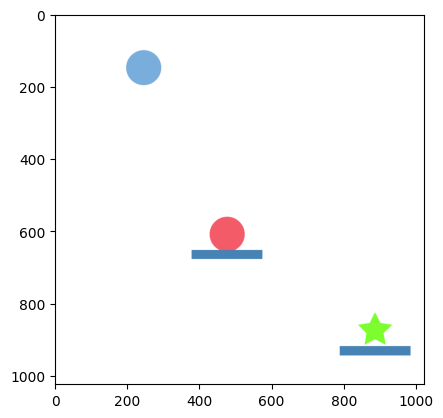

In [81]:
# env1 = gym.make('CreateLevelCustomPush-v0')
# env2 = gym.make('CreateLevelCustomPush2-v0')

# # Try any environment here
# env = env1

obs = env.reset()
print(obs.shape)
done = False
frames = []
frames.append(env.render('rgb_array_high_mega_changed_colors'))
i = 0
while not done:
    # action = actions[i%len(actions)]
    # print(action)
    # action = env.action_space.sample()
    action = actions[i%len(actions)]
    # print(action)
    obs, reward, done, info = env.step(action)

    print(reward)
    frame = env.render('rgb_array_high_mega_changed_colors')
    frames.append(frame)
    i += 1

def update(i):
    ax.imshow(frames[i])

fig, ax = plt.subplots(1,1)

# Render the frames array to the screen. 
# If this doesn't work you can try another way from this StackOverflow thread: 
# https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook
ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(frames))
ani

In [ ]:
env1_solver_xy = [[0.6,0.5],[-0.35,-0.5]]
env1_solver_tools = [[0,15],[0,15]]
env2_solver_xy = [[0.7,0.5],[-0.2,-0.5]]
env2_solver_tools = [[15],[0,15]]
env3_solver_xy = [[0.6,0.3],[-0.4,-0.65]]
env3_solver_tools = [[0,15],[0]]
env4_solver_xy = [[0.55,0.3],[-0.4,-0.5]]
env4_solver_tools = [[0,15],[15]]
env5_solver_xy = [[0.6,0.3],[-0.3,-0.5]]
env5_solver_tools = [[15],[0,15]]

In [89]:
env = gym.make('CreateLevelCustomPush-v0')
obs = env.reset()
done = False
env.render('human')
i = 0
while not done:
    tool,x,y = map(float, input("space separated actions: ").split())
    action = [int(tool),x,y]
    obs, reward, done, info = env.step(action)
    i += 1

ValueError: not enough values to unpack (expected 3, got 0)

In [1]:
a = input("list")

In [5]:
x, y, z = map(float, input("Enter integer followed by two floats, separated by spaces: ").split())

float

In [18]:
ani.save('hi.mp4')

In [7]:
env.action_space['index']

Discrete(1)

In [1]:
import torch

In [2]:
x = torch.randn(5, 3, 10)

In [3]:
histograms = torch.zeros((5, 3, 10))
for i in range(5):
  for j in range(3):
    histograms[i, j] = torch.histc(x[i, j], bins=10, min=0, max=10)
    histograms[i, j] += torch.ones_like(histograms[i, j])
    histograms[i, j] /= sum(histograms[i, j])
  

In [7]:
samples = torch.multinomial(histograms, num_samples=1, replacement=True)

RuntimeError: prob_dist must be 1 or 2 dim

In [ ]:

# perform random sampling based on the frequency probabilities
samples = torch.multinomial(probabilities, num_samples=1, replacement=True)

# select the samples along the last dimension of the original tensor
selected = torch.gather(x, dim=-1, index=samples)

In [1]:
import math
import random
import json

MARKER_BALL = (0.6,0.75)
MEDIUM_FLOOR_0 = (0.1,-0.25)
MEDIUM_FLOOR_1 = (-0.7,-0.75)
GOAL_STAR = (-0.7, -0.75)
TARGET = (0.1, -0.25)
RADIUS = 0.2

def get_placement(centre, radius):
    # random angle
    alpha = 2 * math.pi * random.random()
    # random radius
    r = radius * math.sqrt(random.random())
    # calculating coordinates
    x = round(r * math.cos(alpha) + centre[0],2)
    y = round(r * math.sin(alpha) + centre[1],2)
    if x<-1 or x>1:
        if abs(-1-x)>abs(1-x):
            x = 0.9
        else:
            x = -0.9

    if y<-1 or y>1:
        if abs(-1-y)>abs(1-y):
            y = 0.9
        else:
            y = -0.9

    new_pos = (x, y)
    return new_pos

def read_custom_json(filename):
    custom_json_obj = json.load(open(filename))
    return custom_json_obj

def rewrite_json(custom_json_obj):
    new_marker_ball = get_placement(MARKER_BALL, RADIUS)
    new_medium_floor_0 = get_placement(MEDIUM_FLOOR_0, RADIUS)
    new_medium_floor_1 = get_placement(MEDIUM_FLOOR_1, RADIUS)
    new_target = get_placement(TARGET, RADIUS)
    new_goal = get_placement(GOAL_STAR, RADIUS)

    custom_json_obj["target"] = "["+str(new_target[0]) + ", " + str(new_target[1])+" + OFFSET]"
    custom_json_obj["goal"] = "["+str(new_goal[0]) + ", " + str(new_goal[1])+" +  OFFSET]"

    
    custom_json_obj["env"][0]["pos"] = [new_marker_ball[0], new_marker_ball[1]]
    custom_json_obj["env"][1]["pos"] = "["+str(new_target[0]) + ", " + str(new_target[1])+"]"
    custom_json_obj["env"][2]["pos"] = "["+str(new_goal[0]) + ", " + str(new_goal[1])+"]"

    return custom_json_obj

ans = read_custom_json("/home/soham/USC/Courses/CSCI566_DeepLearning/CREATE/examples/custom_json/level_custom.json")

new_custom_json = rewrite_json(ans)


# Serializing json
json_object = json.dumps(new_custom_json, indent=4)

In [7]:
register_json_str(json_object)

Error: Cannot re-register id: CreateLevelCustomPush_Det-v0

In [5]:
import math
import random
import json
import sys
# from create_game import register_json_folder, register_json_str
import gym

MARKER_BALL = (0.6,0.75)
MEDIUM_FLOOR_0 = (0.1,-0.25)
MEDIUM_FLOOR_1 = (-0.7,-0.75)
GOAL_STAR = (-0.7, -0.75)
TARGET = (0.1, -0.25)
RADIUS = 0.15

def get_placement(centre, radius):
    # random angle
    alpha = 2 * math.pi * random.random()
    # random radius
    r = radius * math.sqrt(random.random())
    # calculating coordinates
    x = round(r * math.cos(alpha) + centre[0],2)
    y = round(r * math.sin(alpha) + centre[1],2)
    if x<-1 or x>1:
        if abs(-1-x)>abs(1-x):
            x = 0.9
        else:
            x = -0.9

    if y<-1 or y>1:
        if abs(-1-y)>abs(1-y):
            y = 0.9
        else:
            y = -0.9

    new_pos = (x, y)
    return new_pos

def read_custom_json(filename):
    custom_json_obj = json.load(open(filename))
    return custom_json_obj

def rewrite_json(custom_json_obj, new_name):
    new_marker_ball = get_placement(MARKER_BALL, RADIUS)
    new_medium_floor_0 = get_placement(MEDIUM_FLOOR_0, RADIUS)
    new_medium_floor_1 = get_placement(MEDIUM_FLOOR_1, RADIUS)
    new_target = get_placement(TARGET, RADIUS)
    new_goal = get_placement(GOAL_STAR, RADIUS)

    custom_json_obj["target"] = "["+str(new_target[0]) + ", " + str(new_target[1])+" + OFFSET]"
    custom_json_obj["goal"] = "["+str(new_goal[0]) + ", " + str(new_goal[1])+" +  OFFSET]"

    
    custom_json_obj["env"][0]["pos"] = [new_marker_ball[0], new_marker_ball[1]]
    custom_json_obj["env"][1]["pos"] = "["+str(new_target[0]) + ", " + str(new_target[1])+"]"
    custom_json_obj["env"][2]["pos"] = "["+str(new_goal[0]) + ", " + str(new_goal[1])+"]"

    custom_json_obj["name"] = new_name

    return custom_json_obj

def create_random_env(env_prefix, n):
    ans = read_custom_json("/home/soham/USC/Courses/CSCI566_DeepLearning/CREATE/examples/custom_json_2/level_custom.json")
    # register_json_folder('./random_envs')
    env_list = []

    for i in range(n):
        new_name = env_prefix+"CustomPush"+str(i)

        new_custom_json = rewrite_json(ans, new_name)

        # Serializing json
        json_object = json.dumps(new_custom_json, indent=4)
        
        # Writing to random envs
        filename = "./five_envs/"+new_name+".json"
        
        with open(filename, "w") as outfile:
            outfile.write(json_object)

        # create env
        register_json_str(json_object)
        env = gym.make('CreateLevel'+new_name+'-v0')
        env_list.append(env)

    return env_list

register_json_folder('/home/soham/USC/Courses/CSCI566_DeepLearning/CREATE/examples/five_envs')
env_list = create_random_env(env_prefix="Two", n=5)

In [10]:
env_list[0]

In [4]:
# register_json_folder('/home/soham/USC/Courses/CSCI566_DeepLearning/CREATE/examples/five_envs')
env =gym.make('CreateLevelTwoCustomPush0-v0')

In [5]:
env